(concepts_advanced)=

# Advanced Concepts

More information regarding the numerical and computational formulation in FLORIS
are detailed here. See [Introductory Concepts](intro_concepts) for a guide on the basics.

In [1]:
# Create a basic FLORIS model for use later
import numpy as np
import matplotlib.pyplot as plt
from floris import FlorisModel
fmodel = FlorisModel("gch.yaml")

## Data structures

FLORIS adopts a structures of arrays data modeling paradigm (SoA, relative to array of structures {AoS})
for nearly all of the data in the `floris.core` package.
This data model enables vectorization (SIMD operations) through Numpy array broadcasting
for many operations.
In general, there are two types of array shapes:
- Field quantities have points throughout the computational domain but in context-specific locations
    and have the shape `(n findex, n turbines, n grid, n grid)`.
- Scalar quantities have a single value for each turbine and typically have the shape
    `(n findex, n turbines, 1, 1)`. For scalar quanities, the arrays
    may be created with the shape `(n findex, n turbines)` and
    then expanded to the 4-dimensional shape prior to running the wake calculation.

## Grids

FLORIS includes a number of grid-types that create sampling points within the computational
domain for different contexts. In the typical use case, AEP or some other metric of wind
farm energy yield is the end result. Since the mathematical models in FLORIS are all
analytical, we only need to create points on the turbines themselves in order to calculate
the incoming wind speeds given all of the upstream conditions. In this case, we use
the {py:meth}`floris.core.grid.TurbineGrid` or {py:meth}`floris.core.grid.TurbineCubatureGrid`.
Each of these grid-types put points only on the turbine swept area, so all other
field-quantities in FLORIS have the same shape.

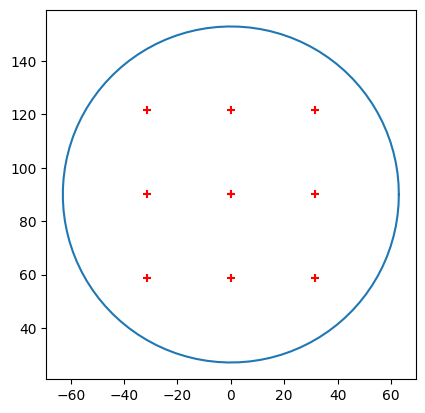

In [2]:
# Plot the grid point locations for TurbineGrid and TurbineCubatureGrid

fmodel.set(layout_x=[0.0], layout_y=[0.0])
rotor_radius = fmodel.core.farm.rotor_diameters[0] / 2.0
hub_height = fmodel.core.farm.hub_heights[0]
theta = np.linspace(0, 2*np.pi, 100)
circlex = rotor_radius * np.cos(theta)
circley = rotor_radius * np.sin(theta) + hub_height

# TurbineGrid is the default
fig, ax = plt.subplots()
ax.scatter(0, hub_height, marker="+", color="r")
ax.scatter(fmodel.core.grid.y_sorted[0,0], fmodel.core.grid.z_sorted[0,0], marker="+", color="r")
ax.plot(circlex, circley)
ax.set_aspect('equal', 'box')
plt.show()